In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [13]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data3.csv")
df;
X = df.drop(['Target','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values
X1= df.drop(['Target','Voc','Isc','Vmp','Imp','Pmp','T','G',],axis=1).values
Y=df.drop(['Voc','Isc','Vmp','Imp','Pmp','T','G','I1','I2','I3','I4','I5','I6','I7','I8',],axis=1).values
X.shape

(1600, 7)

In [14]:
pca = PCA(n_components=7)

In [15]:
pca.fit(X)

PCA(n_components=7)

In [16]:
X_pca = pca.transform(X)

In [17]:
trainX, testX,trainY,testY = train_test_split(X_pca ,Y, test_size=0.3, random_state=0)

In [18]:
#sc=StandardScaler()

#scaler = sc.fit(trainX)
#trainX = scaler.transform(trainX)
#testX = scaler.transform(testX)

In [19]:
model = RandomForestClassifier(n_estimators=41, max_depth=7, criterion='entropy' ,random_state=0)

In [20]:
model.fit(trainX,trainY);

<ipython-input-20-fff28d2abc03>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(trainX,trainY);


In [21]:
ypred=model.predict(trainX)

In [22]:
c=accuracy_score(trainY,ypred)*100
c

99.01785714285715

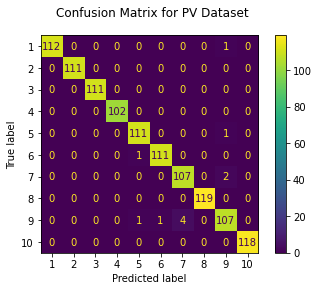

In [23]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [24]:
ypred1=model.predict(testX)

In [25]:
c1=accuracy_score(testY,ypred1)*100
c1

93.54166666666667

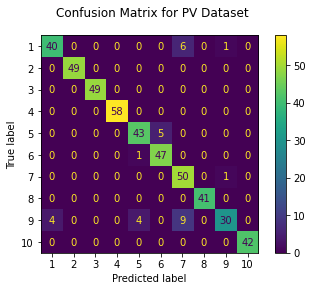

In [26]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [27]:
YR=np.concatenate((trainY,testY),axis=0)

In [28]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [29]:
ac2=accuracy_score(YR,YP)*100
ac2

97.375

In [30]:
c2=confusion_matrix(YR,YP)
c2

array([[152,   0,   0,   0,   0,   0,   6,   0,   2,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 160,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 154,   5,   0,   0,   1,   0],
       [  0,   0,   0,   0,   2, 158,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 157,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [  4,   0,   0,   0,   5,   1,  13,   0, 137,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 160]], dtype=int64)